# Object Detection In Google Colab (GPU Enablbed)



# Cloning and Building Darknet



In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 13572 (delta 0), reused 2 (delta 0), pack-reused 13567
Receiving objects: 100% (13572/13572), 12.19 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (9255/9255), done.


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

# Download pretrained YOLOv3 weights
YOLOv3 can detect 80 classs which was trained on coco dataset. we will save this weighted file in home directory of recenetly clone darknet 

In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-05-30 17:50:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   829KB/s    in 5m 0s   

2020-05-30 17:55:32 (808 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# functions to show after prediction
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# Run Detections with Darknet and YOLOv3!

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** TO see the detected image run following command
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'



In [0]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

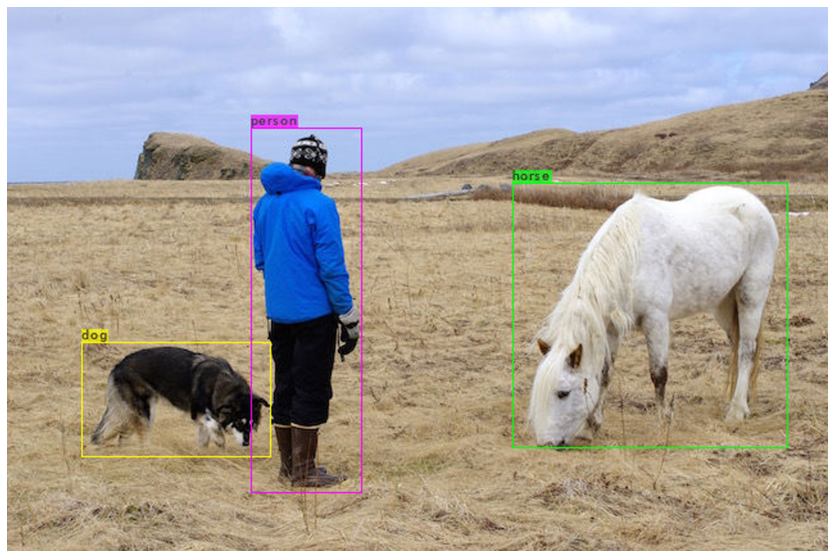

In [0]:
# show image using our helper function
imShow('predictions.jpg')

In [0]:
#  another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

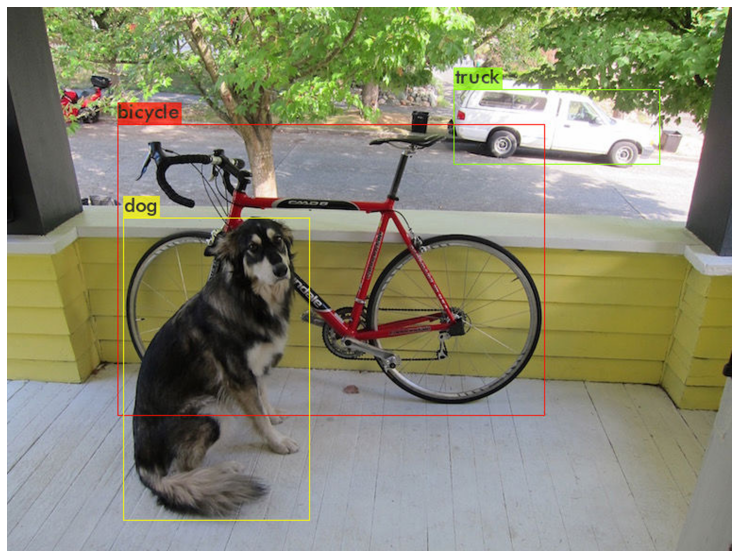

In [0]:
imShow('predictions.jpg')

In [0]:
#mount your google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'1SI17CS048 (1).gdoc'
 1SI17CS048.gdoc
 1SI17CS048_LAB_PROGRAMS.gdoc
 C7B5D5EC-C6B2-488A-80B1-AA54D4AA3FF8.jpeg
 CG_Assignment.gdoc
 CG_GroupActivityReport.gdoc
'Chapter-1 Request Accepted.docx'
 Classroom
'Colab Notebooks'
 Coverpage.gdoc
 CustomObjectDetection
 dataset
 errorsfinal.xlsx
 F_RESUME.gdoc
 Idea1.gdoc
 Idea2.gdoc
 IMG20190706191013.jpeg
'Mail Trial.gsheet'
 Mistakes.xlsx
 PAGING.gdoc
 pr.cpp
 Project1
 Quest_Posters
'RESUME (1).gdoc'
 RESUME.doc
 RESUME.gdoc
 SatyaResumeNew.gdoc
 SatyaResumeNew.pdf
'Screenshot from 2020-02-06 15:45:09.png'
 Section3-Solution-Presentation-Template.gslides
 Selected
 SIH.rar
 sonakshiQTSresume.gdoc
 timetable.gdoc
'Untitled form (1).gform'
'Untitled form (File responses)'
'Untitled form.gform'
'YAMM Attachments'
'ZS Campus Beats Case Challenge 2020 - Confidentiality Form.gdoc'


In [0]:
#function to upload files from local system
def upload():
  from google.colab import files
  uploaded_file = files.upload()
  for name , data in uploaded_file.items():
    with open (name, 'wb') as f:
      f.write(data)
      print('saved file', name)

In [0]:
#Function to download file from colab to local system
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!ls

darknet  gdrive  sample_data


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/CustomObjectDetection/obj.zip ../

In [0]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d darknet/data/

Archive:  ../obj.zip
  inflating: darknet/data/Images/1.jpg  
  inflating: darknet/data/Images/1.txt  
  inflating: darknet/data/Images/10.jpg  
  inflating: darknet/data/Images/10.txt  
  inflating: darknet/data/Images/100.jpg  
  inflating: darknet/data/Images/100.txt  
  inflating: darknet/data/Images/102.jpg  
  inflating: darknet/data/Images/102.txt  
  inflating: darknet/data/Images/103.jpg  
  inflating: darknet/data/Images/103.txt  
  inflating: darknet/data/Images/11.jpg  
  inflating: darknet/data/Images/11.txt  
  inflating: darknet/data/Images/12.jpg  
  inflating: darknet/data/Images/12.txt  
  inflating: darknet/data/Images/13.jpg  
  inflating: darknet/data/Images/13.txt  
  inflating: darknet/data/Images/14.jpg  
  inflating: darknet/data/Images/14.txt  
  inflating: darknet/data/Images/17.jpg  
  inflating: darknet/data/Images/17.txt  
  inflating: darknet/data/Images/18.jpg  
  inflating: darknet/data/Images/18.txt  
  inflating: darknet/data/Images/19.jpg  
  inflati

In [0]:
cd darknet

/content/darknet


In [0]:
#upload the custom cfg file to cloud VM
!cp /mydrive/CustomObjectDetection/yolov3_custom.cfg cfg/

In [0]:
#upload the name and data file to darknet/data folder
!cp /mydrive/CustomObjectDetection/obj.names data/
!cp /mydrive/CustomObjectDetection/obj.data data/

In [0]:
# upload the script.py script to cloud VM from Google Drive
!cp /mydrive/CustomObjectDetection/script.py ./

In [0]:
#run the script.py and it will create a train.txt(having realtive path of all images and .txt file) file in darkent/data/ 
!python script.py

In [0]:
#see the generated train.txt file
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-05-30 18:30:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   504KB/s    in 5m 57s  

2020-05-30 18:36:09 (445 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# uncomment it and run to restart your model training from the last iteration it crashed

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/CustomObjectDetection/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.859180, GIOU: 0.857660), Class: 0.999052, Obj: 0.976000, No Obj: 0.007596, .5R: 1.000000, .75R: 1.000000, count: 5, class_loss = 0.008983, iou_loss = 0.028628, total_loss = 0.037611 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1

In [0]:
#change the custom cfg file from training mode to testing mode for testing the newely generated weighted file

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
#command for detection with new weighted file

!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/CustomObjectDetection/yolov3_custom_final.weights /mydrive/CustomObjectDetection/test.jpg -thresh 0.3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

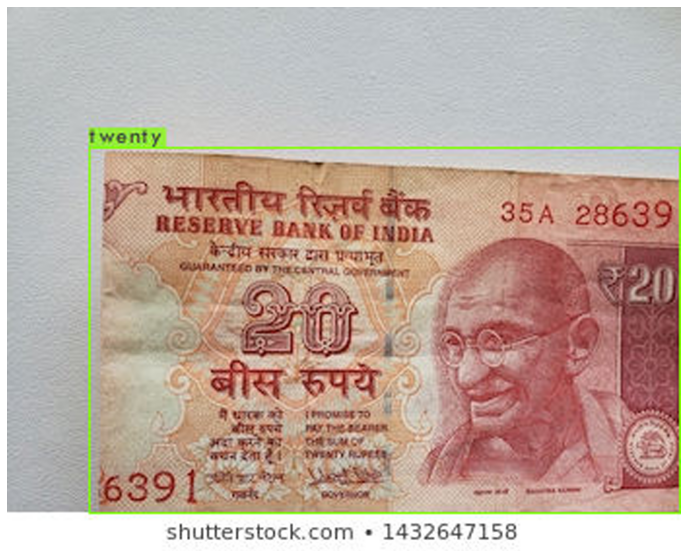

In [0]:
imShow('predictions.jpg')